## CO2 Density and Viscosity Correlation
Fitted by M. Burgoyne (Nov 2023) to NIST pure CO2 data over the range 0 - 300 degF and 14.7 - 15,000 psia

Currently unpublished - seeking feedback on whether of sufficient interest for a paper. Otherwise I'll probably just share in a LinkedIn post

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib
import matplotlib.cm as cm # matplotlib's color map library

import CO2_Props as co2

In [3]:
# CO2 density, Viscosity and Compressibility at 2,000psia and 140 degF
fluid = co2.CO2_props(psia = 2000, degf = 140)
print('CO2 Density:', fluid.den, '(lb/cuft)')
print('CO2 Viscosity:', fluid.vis, '(cP)')
print('CO2 Phase:', fluid.phase)
print('CO2 Compressibility:', fluid.cf, '(1/psi)')
print('CO2 Z-Factor:', fluid.Z)

CO2 Density: 34.238619176343605 (lb/cuft)
CO2 Viscosity: 0.04045849403991163 (cP)
CO2 Phase: Supercritical
CO2 Compressibility: 0.0006446411505248086 (1/psi)
CO2 Z-Factor: 0.3994692821425697


In [4]:
# CO2 properties at 80 degF and 1,200 psia
fluid = co2.CO2_props(psia = 1200, degf = 80)
print('CO2 Density:', fluid.den, '(lb/cuft)')
print('CO2 Viscosity:', fluid.vis, '(cP)')
print('CO2 Phase:', fluid.phase)
print('CO2 Compressibility:', fluid.cf, '(1/psi)')
print('CO2 Z-Factor:', fluid.Z)
print('Saturation pressure:', fluid.psat, '(psia)')

CO2 Density: 47.76307096157477 (lb/cuft)
CO2 Viscosity: 0.06544851987866054 (cP)
CO2 Phase: HP Liquid
CO2 Compressibility: 0.0002499685108457021 (1/psi)
CO2 Z-Factor: 0.1909161575142684
Saturation pressure: 969.6919526183999 (psia)


In [5]:
# CO2 properties at 80 degF and 750 psia
fluid = co2.CO2_props(psia = 750, degf = 80)
print('CO2 Density:', fluid.den, '(lb/cuft)')
print('CO2 Viscosity:', fluid.vis, '(cP)')
print('CO2 Phase:', fluid.phase)
print('CO2 Compressibility:', fluid.cf, '(1/psi)')
print('CO2 Z-Factor:', fluid.Z)
print('Saturation pressure:', fluid.psat, '(psia)')
print('Saturation temperature:', fluid.tsat, '(degF)')

CO2 Density: 8.52298453129441 (lb/cuft)
CO2 Viscosity: 0.016775224414524594 (cP)
CO2 Phase: Vapor
CO2 Compressibility: 0.0022995785491395928 (1/psi)
CO2 Z-Factor: 0.6686875607939402
Saturation pressure: 969.6919526183999 (psia)
Saturation temperature: 60.240724315625016 (degF)


In [13]:
# And now make density and viscosity maps - it will take a few minutes to go through the 400K+ cells

In [16]:
# Make a file name that only contains safe characters
# @param inputFilename: A filename that can contain illegal characters
# @return: A filename containing only safe characters
def makeSafeFilename(inputFilename):   
    return "".join([c for c in inputFilename if c.isalpha() or c.isdigit() or c==' ' or c=='_' or c=='-']).rstrip()

def plot_grid(X, Y, grid_props, levels, xlim, ylim, xlabel, ylabel, grid_label, title, png = False, reverse = False):
    pcrit, tcrit = 1070.0, 87.7608
    rcParams['figure.figsize'] = 18.75, 9 # sets plot size
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Generate a color mapping of the levels we've specified
    if not reverse:
        cpf = ax.contourf(X, Y, grid_props, len(levels), cmap='RdYlBu_r')
    else:
        cpf = ax.contourf(X, Y, grid_props, len(levels), cmap='RdYlBu')
    line_colors = ['black' for l in cpf.levels] # Set all level lines to black
    
    # Make plot and customize axes
    cp = ax.contour(X, Y, grid_props, levels=levels, colors=line_colors)
    ax.clabel(cp, fontsize=13, colors=line_colors)
    
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    
    # Make a colorbar for the ContourSet returned by the contour call.
    cbar = fig.colorbar(cpf)
    cbar.ax.set_ylabel(grid_label, fontsize=16)
    cbar.add_lines(cp)  # Add the contour line levels to the colorbar
    
    ax.set_title(title, fontsize=24)
    ax.plot([pcrit], [tcrit], 'o', c='r' , markersize=10)
    if png:
        fig.savefig(makeSafeFilename(title)+'.png', dpi=1200)


In [5]:
# Calculate over a grid for plotting (this will take a few minutes - It's doing over a 400,000 points)
unique_degf = np.array(list(range(25, 300, 2)))
unique_psias = np.array(list(range(15, 15000, 5)))

grid_dens = []
grid_vis = []
grid_cfs = []

for degf in unique_degf:
    for psia in unique_psias:
        fluid = co2.CO2_props(psia = psia, degf = degf)
        grid_dens.append(fluid.den)
        grid_vis.append(fluid.vis)
        grid_cfs.append(fluid.cf)
        
grid_dens = np.array(grid_dens).reshape(len(unique_degf), len(unique_psias))
grid_vis = np.array(grid_vis).reshape(len(unique_degf), len(unique_psias))
grid_cfs = np.array(grid_cfs).reshape(len(unique_degf), len(unique_psias))
X, Y = np.meshgrid(unique_psias,unique_degf)

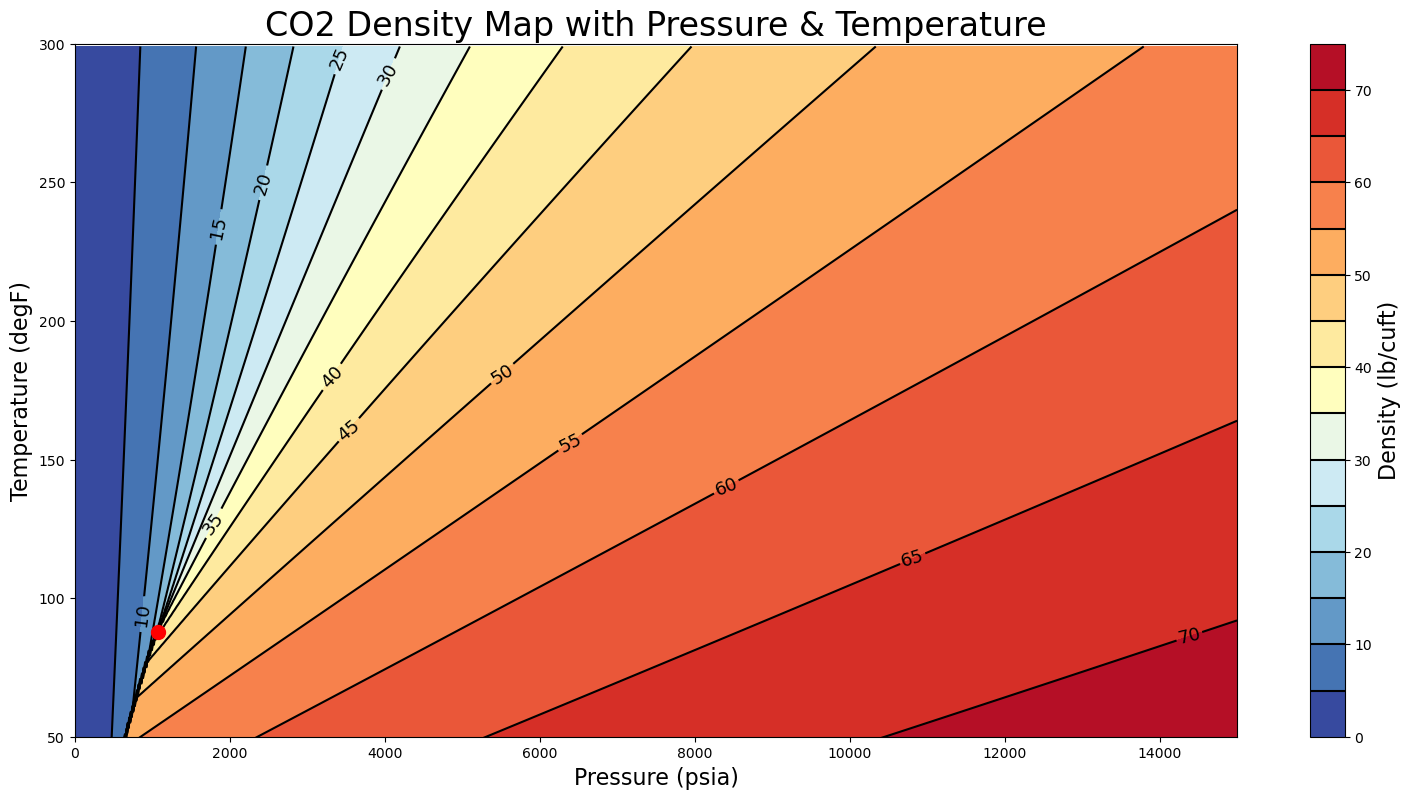

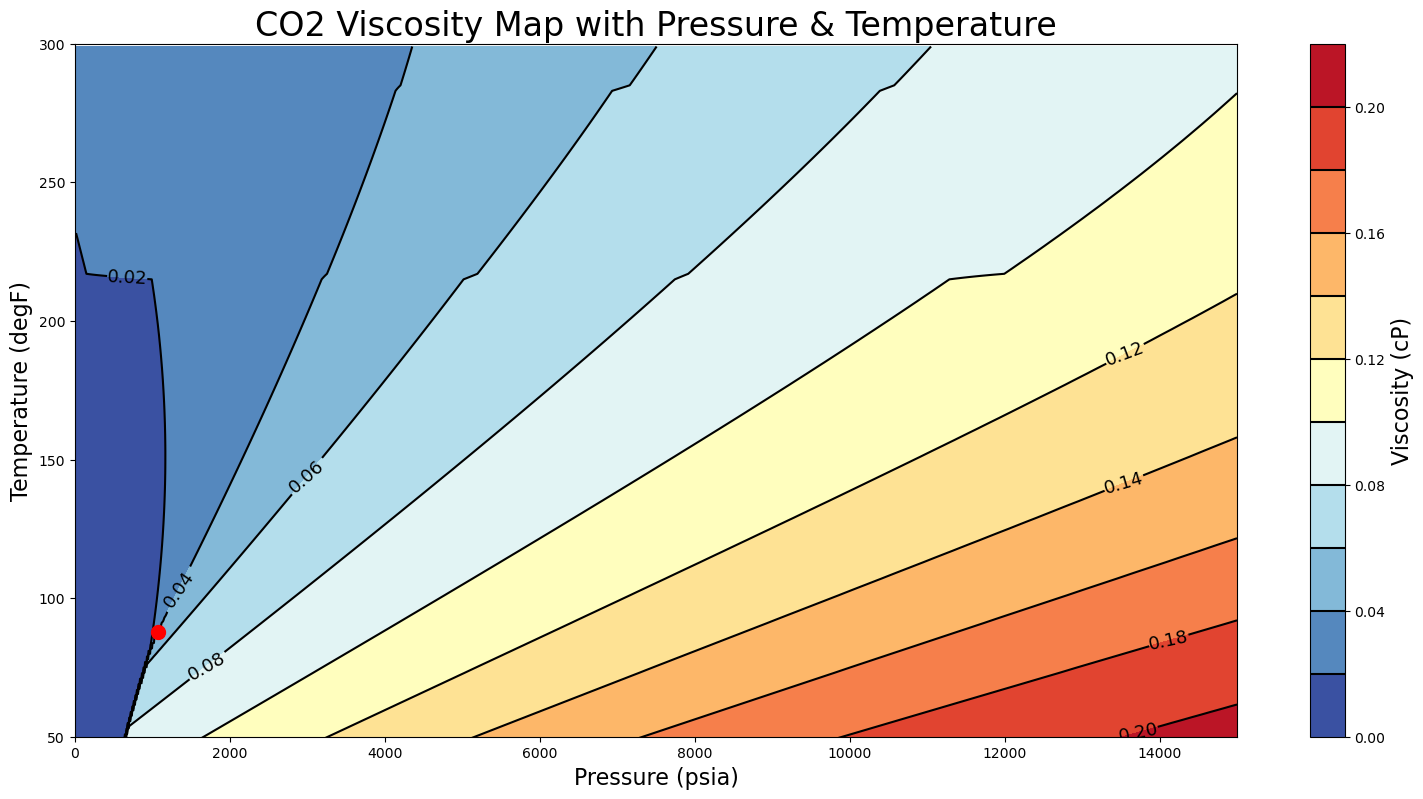

In [18]:
# Plot Density
levels = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])  # Define levels in z-axis where we want lines to appear
plot_grid(X, Y, grid_dens, levels, (0, 15000), (50, 300), 'Pressure (psia)', 'Temperature (degF)', 'Density (lb/cuft)', 'CO2 Density Map with Pressure & Temperature', png=False)

# Plot Viscosity
levels = np.linspace(0.02, 0.2, 10)  # Define levels in z-axis where we want lines to appear
plot_grid(X, Y, grid_vis, levels, (0, 15000), (50, 300), 'Pressure (psia)', 'Temperature (degF)', 'Viscosity (cP)', 'CO2 Viscosity Map with Pressure & Temperature', png=False)

#levels = np.linspace(np.min(grid_cfs), np.max(grid_cfs), 10)  # Define levels in z-axis where we want lines to appear
#plot_grid(X, Y, grid_cfs, levels, (0, 15000), (50, 300), 'Pressure (psia)', 'Temperature (degF)', 'Compressibility (1/psi)', 'CO2 Compressibility Map with Pressure & Temperature', png=False)